In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE=512
EPOCHS=3
DEVICE=torch.device("cpu")

In [ ]:
train_loader=torch.utils.data.DataLoader(
    datasets.MNIST('data',train=True,download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.0137,),(0.3081,))])),batch_size=BATCH_SIZE,shuffle=True
)
test_loader=torch.utils.data.DataLoader(
    datasets.MNIST('data',train=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.0137,),(0.3081,))])),batch_size=BATCH_SIZE,shuffle=True
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [1]:
#检查数据
examples=enumerate(test_loader)
batch_idx,(example_data,example_targets)=next(examples)
print(example_targets)
print(example_data.shape)

fig=plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0],cmap='gray',interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.xticks([])
plt.show()

NameError: ignored

In [ ]:
#定义CNN模型
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    #1*1*28*28
    self.conv1=nn.Conv2d(1,10,5)
    self.conv2=nn.Conv2d(10,20,3)
    self.fc1=nn.Linear(20*10*10,500)
    self.fc2=nn.Linear(500,10)

  def forward(self,x):
    in_size=x.size(0)
    out=self.conv1(x)#1*10*24*24
    out=F.relu(out)
    out=F.max_pool2d(out,2,2)
    out=self.conv2(out)
    out=F.relu(out)
    out=out.view(in_size,-1)
    out=self.fc1(out)
    out=F.relu(out)
    out=self.fc2(out)
    out=F.log_softmax(out,dim=1)
    return out

In [ ]:
#生成模型和优化器
model=ConvNet().to(DEVICE)
optimizer=optim.Adam(model.parameters())

In [ ]:
#定义训练函数
train_losses=[]
train_counter=[]
def train(model,device,train_loader,optimizer,epoch):
  model.train()
  for batch_idx, (data,target) in enumerate(train_loader):
    data,target=data.to(device),target.to(device)
    optimizer.zero_grad()
    output=model(data)
    loss=F.nll_loss(output,target)
    loss.backward()
    optimizer.step()
    if (batch_idx+1)%10==0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,batch_idx*len(data),len(train_loader.dataset),100.*batch_idx/len(train_loader),loss.item()))
    train_losses.append(loss.item())
    train_counter.append((batch_idx*512)+((epoch-1)*len(train_loader.dataset)))
    torch.save(model.state_dict(),'./model.pth')
    torch.save(optimizer.state_dict(),'./optimizer.pth')

In [ ]:
#定义测试函数
test_losses=[]
test_counter=[i*len(train_loader.dataset) for i in range(EPOCHS+1)]
def test(model,device,test_loader):
  model.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for data,target in test_loader:
      data,target=data.to(device),target.to(device)
      output=model(data)
      test_loss+=F.nll_loss(output,target,reduction='sum')
      pred=output.max(1,keepdim=True)[1]#找到概率最大的下标
      correct+=pred.eq(target.view_as(pred)).sum().item()

    test_loss/=len(test_loader.dataset)
    test_losses.append(test_loss)
    print("\nTest Set: Average loss: {:.4f},Accurancy: {}/{} ({:.0f}%) \n".format(test_loss,correct,len(test_loader.dataset),100.*correct/len(test_loader.dataset)))


Test Set: Average loss: 2.3099,Accurancy: 654/10000 (7%) 

Train Epoch: 1 [4608/60000 (8%)]	Loss: 0.745789
Train Epoch: 1 [9728/60000 (16%)]	Loss: 0.370205
Train Epoch: 1 [14848/60000 (25%)]	Loss: 0.342364
Train Epoch: 1 [19968/60000 (33%)]	Loss: 0.265376
Train Epoch: 1 [25088/60000 (42%)]	Loss: 0.240562
Train Epoch: 1 [30208/60000 (50%)]	Loss: 0.194010
Train Epoch: 1 [35328/60000 (58%)]	Loss: 0.138307
Train Epoch: 1 [40448/60000 (67%)]	Loss: 0.163273
Train Epoch: 1 [45568/60000 (75%)]	Loss: 0.114086
Train Epoch: 1 [50688/60000 (84%)]	Loss: 0.111727
Train Epoch: 1 [55808/60000 (92%)]	Loss: 0.097948

Test Set: Average loss: 0.0999,Accurancy: 9697/10000 (97%) 

Train Epoch: 2 [4608/60000 (8%)]	Loss: 0.090710
Train Epoch: 2 [9728/60000 (16%)]	Loss: 0.102134
Train Epoch: 2 [14848/60000 (25%)]	Loss: 0.065772
Train Epoch: 2 [19968/60000 (33%)]	Loss: 0.070871
Train Epoch: 2 [25088/60000 (42%)]	Loss: 0.101561
Train Epoch: 2 [30208/60000 (50%)]	Loss: 0.078000
Train Epoch: 2 [35328/60000 (58%)]

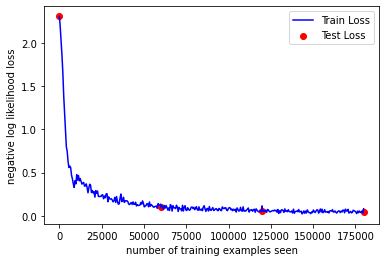

In [ ]:
#开始训练和测试
test(model,DEVICE,test_loader)
for epoch in range(1,EPOCHS+1):
  train(model,DEVICE,train_loader,optimizer,epoch)
  test(model,DEVICE,test_loader)

fig=plt.figure()
plt.plot()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

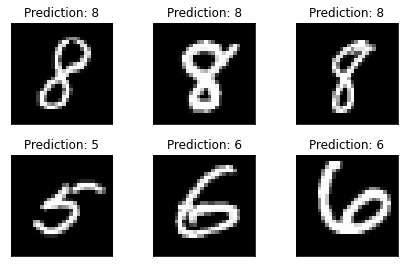

In [ ]:
examples=enumerate(test_loader)
batch_idx,(example_data,example_targets)=next(examples)
with torch.no_grad():
  output=model(example_data)
fig=plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
continued_model=ConvNet().to(DEVICE)
continued_optimizer=optim.Adam(model.parameters())

In [ ]:
model_state_dict=torch.load('model.pth')
continued_model.load_state_dict(model_state_dict)
optimizer_state_dict=torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

Train Epoch: 4 [4608/60000 (8%)]	Loss: 0.037614
Train Epoch: 4 [9728/60000 (16%)]	Loss: 0.025585
Train Epoch: 4 [14848/60000 (25%)]	Loss: 0.034011
Train Epoch: 4 [19968/60000 (33%)]	Loss: 0.019300
Train Epoch: 4 [25088/60000 (42%)]	Loss: 0.047381
Train Epoch: 4 [30208/60000 (50%)]	Loss: 0.048996
Train Epoch: 4 [35328/60000 (58%)]	Loss: 0.056825
Train Epoch: 4 [40448/60000 (67%)]	Loss: 0.024120
Train Epoch: 4 [45568/60000 (75%)]	Loss: 0.032979
Train Epoch: 4 [50688/60000 (84%)]	Loss: 0.033734
Train Epoch: 4 [55808/60000 (92%)]	Loss: 0.039442
Train Epoch: 5 [4608/60000 (8%)]	Loss: 0.043622
Train Epoch: 5 [9728/60000 (16%)]	Loss: 0.041626
Train Epoch: 5 [14848/60000 (25%)]	Loss: 0.038632
Train Epoch: 5 [19968/60000 (33%)]	Loss: 0.023932
Train Epoch: 5 [25088/60000 (42%)]	Loss: 0.040834
Train Epoch: 5 [30208/60000 (50%)]	Loss: 0.037276
Train Epoch: 5 [35328/60000 (58%)]	Loss: 0.038848
Train Epoch: 5 [40448/60000 (67%)]	Loss: 0.021668
Train Epoch: 5 [45568/60000 (75%)]	Loss: 0.034974
Train 

ValueError: ignored

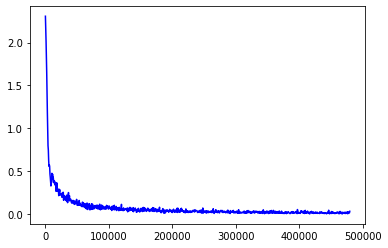

In [ ]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(model,DEVICE,train_loader,optimizer,i)
test(model,DEVICE,test_loader)

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()